In [60]:
# importing libraries

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

In [61]:
data = pd.read_csv('04.reduced_telco_data.csv')
data.head()

,SeniorCitizen,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-Month,Contract_One year,Contract_Two year,...,DeviceProtection_Yes,TechSupport_No,TechSupport_Unknown,TechSupport_Yes,StreamingTV_No,StreamingTV_Unknown,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Unknown,StreamingMovies_Yes
0,0,-0.244200,1,1,0.021083,0.001391,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
1,1,-0.306748,1,0,0.053733,0.002613,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
2,0,-0.744587,1,0,0.004393,0.000401,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
3,0,1.069316,1,1,0.020597,0.002886,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
4,0,-0.619490,1,0,0.041444,0.001535,0,1,0,0,...,1,1,0,0,1,0,0,1,0,0


In [62]:
y = data.iloc[:,6]
tmp = data.drop(data.columns[6], axis=1)
X = tmp.iloc[:,:]


In [63]:
np.random.seed(42)

In [64]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,
    test_size=0.2,
    random_state= 42,
    stratify=y,
)

In [65]:
model1 = DecisionTreeClassifier(criterion = 'gini', max_depth=5,random_state=42)
model1.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,roc_auc_score

model = model1
y_train_pred = model.predict(X_train)
train_accuracy_explicit = accuracy_score(y_train, y_train_pred)
y_test_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1score = f1_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])


print(f"Training_Accuracy: {train_accuracy_explicit}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1score}")
print(classification_report(y_test, y_test_pred))

Training_Accuracy: 0.7673660714285714
Accuracy: 0.7748214285714285
Precision: 0.7029481834425253
Recall: 0.8995807926829268
F1-Score: 0.7892009361417586
              precision    recall  f1-score   support

           0       0.88      0.66      0.76      5952
           1       0.70      0.90      0.79      5248

    accuracy                           0.77     11200
   macro avg       0.79      0.78      0.77     11200
weighted avg       0.80      0.77      0.77     11200



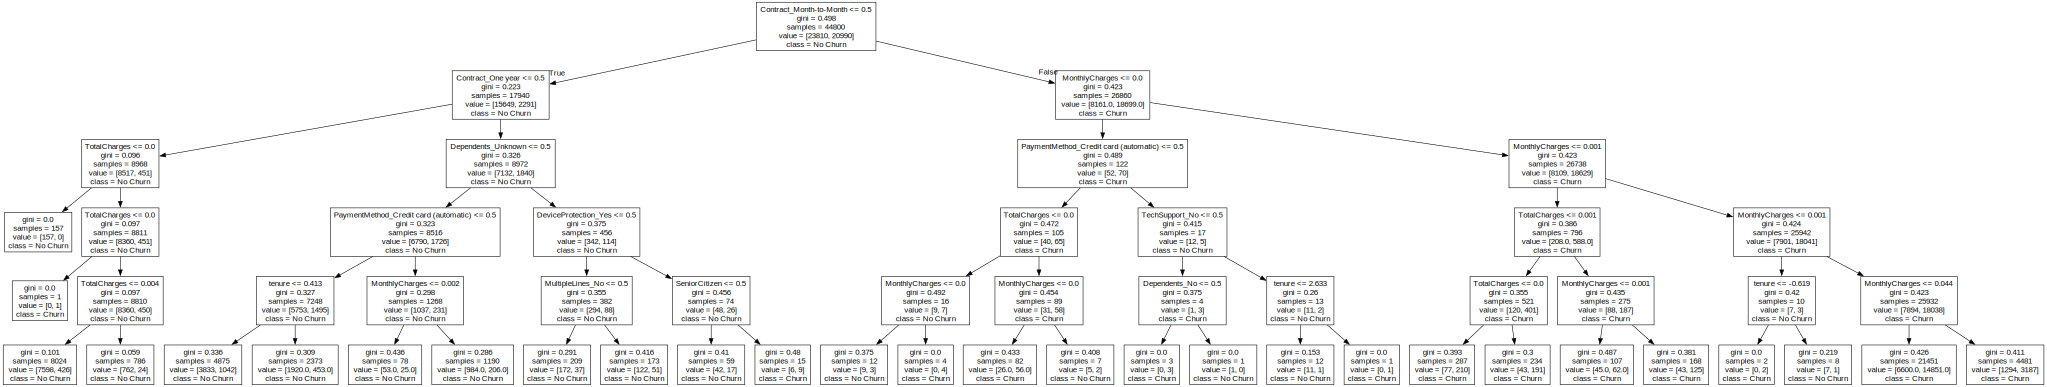

In [67]:
data = tree.export_graphviz(model, out_file = "mytree.dot", feature_names=X.columns[0:], class_names=["No Churn","Churn"])
with open("mytree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

Training_Accuracy: 0.7731473214285715
Accuracy: 0.76875
Precision: 0.6985953377166766
Recall: 0.8908155487804879
F1-Score: 0.7830820770519263
              precision    recall  f1-score   support

           0       0.87      0.66      0.75      5952
           1       0.70      0.89      0.78      5248

    accuracy                           0.77     11200
   macro avg       0.79      0.78      0.77     11200
weighted avg       0.79      0.77      0.77     11200



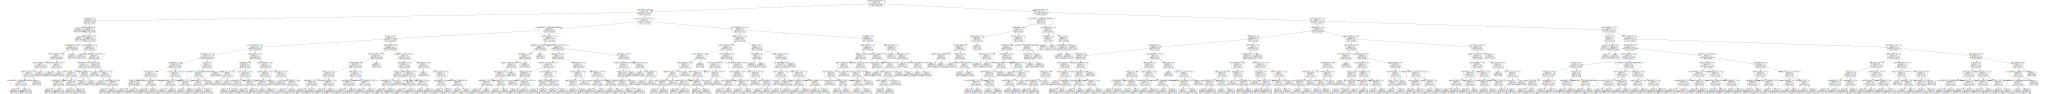

In [68]:
model2 = DecisionTreeClassifier(criterion = 'gini', max_depth=10,random_state=42)
model2.fit(X_train, y_train)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,roc_auc_score

model = model2
y_train_pred = model.predict(X_train)
train_accuracy_explicit = accuracy_score(y_train, y_train_pred)
y_test_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1score = f1_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])


print(f"Training_Accuracy: {train_accuracy_explicit}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1score}")
print(classification_report(y_test, y_test_pred))


data = tree.export_graphviz(model, out_file = "mytree.dot", feature_names=X.columns[0:], class_names=["No Churn","Churn"])
with open("mytree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

Training_Accuracy: 0.7672767857142857
Accuracy: 0.7753571428571429
Precision: 0.7031528851873885
Recall: 0.9009146341463414
F1-Score: 0.78984296692282
              precision    recall  f1-score   support

           0       0.88      0.66      0.76      5952
           1       0.70      0.90      0.79      5248

    accuracy                           0.78     11200
   macro avg       0.79      0.78      0.77     11200
weighted avg       0.80      0.78      0.77     11200



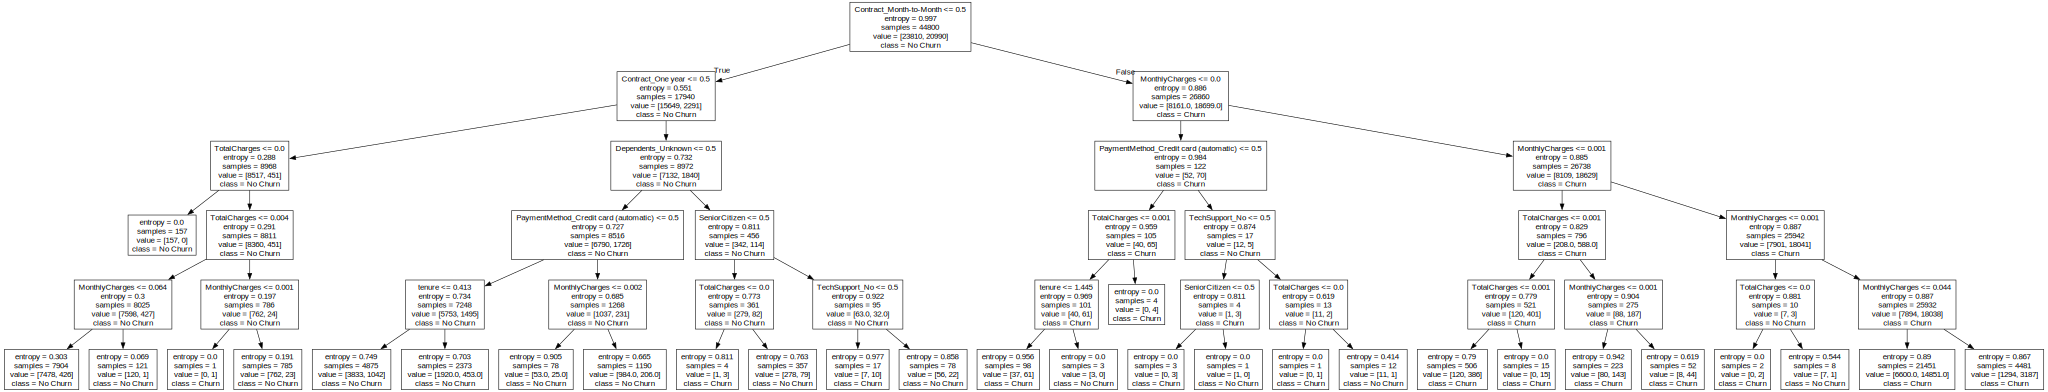

In [69]:
model3 = DecisionTreeClassifier(criterion = 'entropy', max_depth=5,random_state=42)
model3.fit(X_train, y_train)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,roc_auc_score

model = model3
y_train_pred = model.predict(X_train)
train_accuracy_explicit = accuracy_score(y_train, y_train_pred)
y_test_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1score = f1_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])


print(f"Training_Accuracy: {train_accuracy_explicit}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1score}")
print(classification_report(y_test, y_test_pred))


data = tree.export_graphviz(model, out_file = "mytree.dot", feature_names=X.columns[0:], class_names=["No Churn","Churn"])
with open("mytree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

Training_Accuracy: 0.7691964285714286
Accuracy: 0.7725
Precision: 0.7019144481005085
Recall: 0.8942454268292683
F1-Score: 0.7864923747276689
              precision    recall  f1-score   support

           0       0.88      0.67      0.76      5952
           1       0.70      0.89      0.79      5248

    accuracy                           0.77     11200
   macro avg       0.79      0.78      0.77     11200
weighted avg       0.79      0.77      0.77     11200



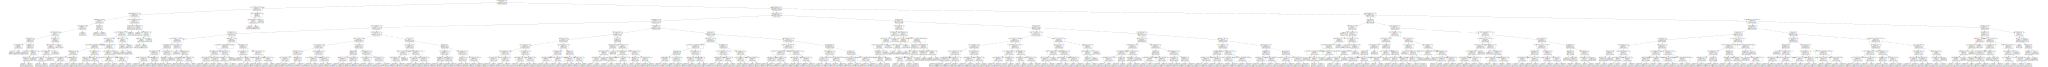

In [70]:
model4 = DecisionTreeClassifier(criterion='gini', max_depth=10, max_features='sqrt', random_state=42)
model4.fit(X_train, y_train)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,roc_auc_score

model = model4
y_train_pred = model.predict(X_train)
train_accuracy_explicit = accuracy_score(y_train, y_train_pred)
y_test_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1score = f1_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])


print(f"Training_Accuracy: {train_accuracy_explicit}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1score}")
print(classification_report(y_test, y_test_pred))


data = tree.export_graphviz(model, out_file = "mytree.dot", feature_names=X.columns[0:], class_names=["No Churn","Churn"])
with open("mytree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

Training_Accuracy: 0.7708705357142858
Accuracy: 0.7708035714285715
Precision: 0.7005835702528804
Recall: 0.8921493902439024
F1-Score: 0.7848461989774537
              precision    recall  f1-score   support

           0       0.87      0.66      0.75      5952
           1       0.70      0.89      0.78      5248

    accuracy                           0.77     11200
   macro avg       0.79      0.78      0.77     11200
weighted avg       0.79      0.77      0.77     11200



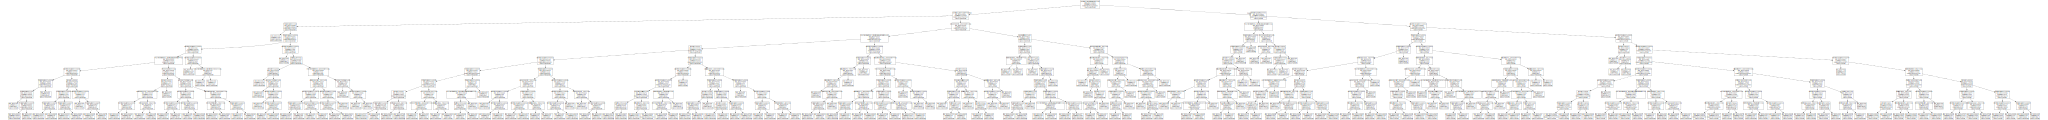

In [71]:
model5 = DecisionTreeClassifier(criterion = 'log_loss', max_depth=10,random_state=42)
model5.fit(X_train, y_train)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,roc_auc_score

model = model5
y_train_pred = model.predict(X_train)
train_accuracy_explicit = accuracy_score(y_train, y_train_pred)
y_test_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1score = f1_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])


print(f"Training_Accuracy: {train_accuracy_explicit}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1score}")
print(classification_report(y_test, y_test_pred))


data = tree.export_graphviz(model, out_file = "mytree.dot", feature_names=X.columns[0:], class_names=["No Churn","Churn"])
with open("mytree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [72]:
# !pip install dtreeviz

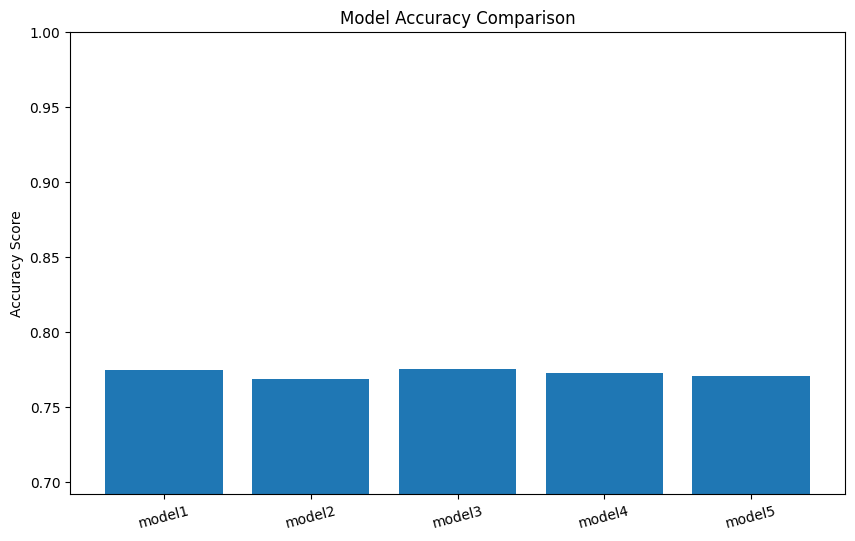

In [73]:
import matplotlib.pyplot as plt
import numpy as np

models = ['model1', 'model2', 'model3', 'model4', 'model5']
accuracy_scores = [accuracy_score(y_test, model1.predict(X_test)), 
                   accuracy_score(y_test, model2.predict(X_test)), 
                   accuracy_score(y_test, model3.predict(X_test)),
                   accuracy_score(y_test, model4.predict(X_test)),
                   accuracy_score(y_test, model5.predict(X_test))]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, )
plt.ylim(min(accuracy_scores) * 0.9, 1.0) # Set y-axis for better visibility
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=15)
plt.show()